# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [0]:
pima_data = pd.read_csv('/content/drive/My Drive/Datasets/pima-indians-diabetes+(3).csv')

In [57]:
#checking data loaded currently or not. Printing first 5 and last 5 rows of the data
pima_data.iloc[np.r_[0:5,-5:0]]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Q2. Print 10 samples from the dataset

In [58]:
# printing random 10 samples
pima_data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
51,1,101,50,15,36,24.2,0.526,26,0
724,1,111,94,0,0,32.8,0.265,45,0
344,8,95,72,0,0,36.8,0.485,57,0
561,0,198,66,32,274,41.3,0.502,28,1
603,7,150,78,29,126,35.2,0.692,54,1
31,3,158,76,36,245,31.6,0.851,28,1
670,6,165,68,26,168,33.6,0.631,49,0
196,1,105,58,0,0,24.3,0.187,21,0
115,4,146,92,0,0,31.2,0.539,61,1
341,1,95,74,21,73,25.9,0.673,36,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [59]:
print("Shape of each pima_data: ", pima_data.shape)
print("Datatypes of each column:\n", pima_data.dtypes)

Shape of each pima_data:  (768, 9)
Datatypes of each column:
 Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [60]:
pima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
pima_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [62]:
print("Checking individual zeros in columns:")
print("Plas: ", pima_data['Plas'].value_counts().sort_index()[0])
print("Pres: ", pima_data['Pres'].value_counts().sort_index()[0])
print("skin: ", pima_data['skin'].value_counts().sort_index()[0])
print("test: ", pima_data['test'].value_counts().sort_index()[0])
print("mass: ", pima_data['mass'].value_counts().sort_index()[0])

Checking individual zeros in columns:
Plas:  5
Pres:  35
skin:  227
test:  374
mass:  11


In [0]:
# Now replacing all the zeros
pima_data['Plas'].replace(to_replace=0, value=np.median(pima_data['Plas']), inplace=True)
pima_data['Pres'].replace(to_replace=0, value=np.median(pima_data['Pres']), inplace=True)
pima_data['skin'].replace(to_replace=0, value=np.median(pima_data['skin']), inplace=True)
pima_data['test'].replace(to_replace=0, value=np.median(pima_data['test']), inplace=True)
pima_data['mass'].replace(to_replace=0, value=np.median(pima_data['mass']), inplace=True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [64]:
print("Checking individual zeros in columns:")
pima_data.describe()

Checking individual zeros in columns:


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [65]:
pima_data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

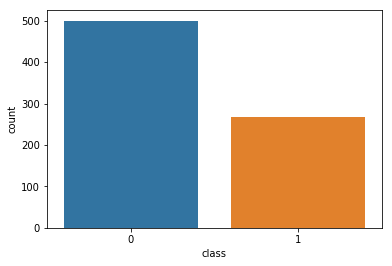

In [67]:
sns.countplot(pima_data['class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

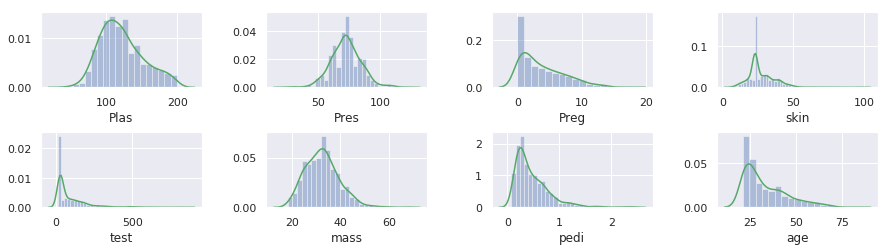

In [75]:
#univariate analysis

sns.set(rc={'figure.figsize':(15,8)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.distplot(a=pima_data['Plas'], kde_kws={ "color":'g'}, axlabel='Plas', ax=plt.subplot(4,4,1))
sns.distplot(a=pima_data['Pres'], kde_kws={ "color":'g'}, axlabel='Pres', ax=plt.subplot(4,4,2))
sns.distplot(a=pima_data['Preg'], kde_kws={ "color":'g'}, axlabel='Preg', ax=plt.subplot(4,4,3))
sns.distplot(a=pima_data['skin'], kde_kws={ "color":'g'}, axlabel='skin', ax=plt.subplot(4,4,4))
sns.distplot(a=pima_data['test'], kde_kws={ "color":'g'}, axlabel='test', ax=plt.subplot(4,4,5))
sns.distplot(a=pima_data['mass'], kde_kws={ "color":'g'}, axlabel='mass', ax=plt.subplot(4,4,6))
sns.distplot(a=pima_data['pedi'], kde_kws={ "color":'g'}, axlabel='pedi', ax=plt.subplot(4,4,7))
sns.distplot(a=pima_data['age'], kde_kws={ "color":'g'}, axlabel='age', ax=plt.subplot(4,4,8))

From the above graphs we can say the following:

 - Plas, Pres, mass, pedi are similar to normal distribution
 - age, Preg, test are somewhat right skewed

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


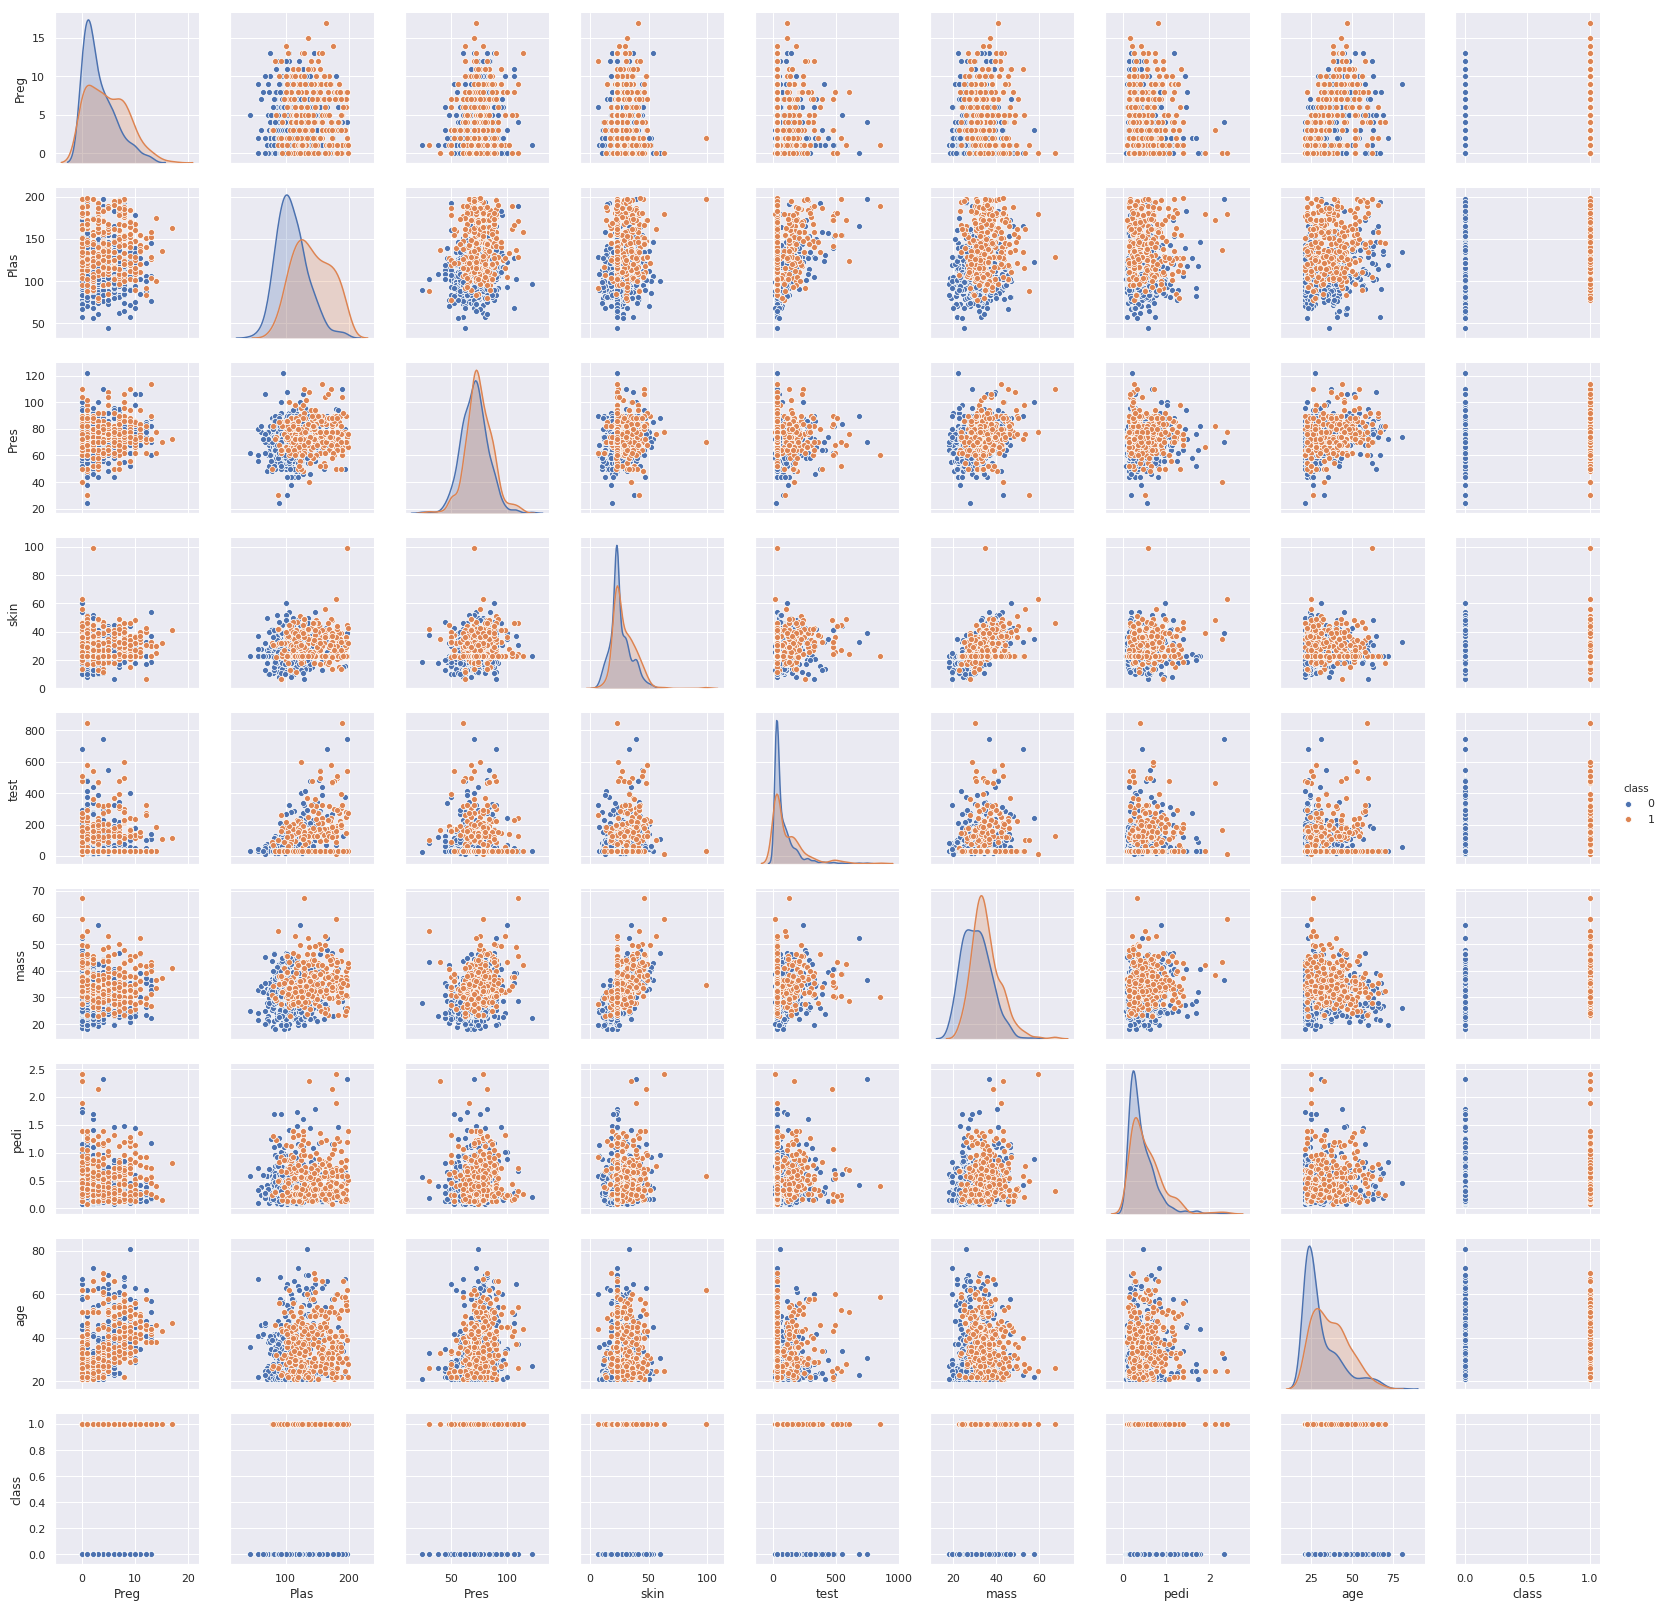

In [79]:
sns.pairplot(pima_data, hue='class');

Using the plot - infer the relationship between different variables

some points which can be seen from pair plots:
(Assumption 0 represent non diabetic and 1 represent diabetics)

- Higher level serum insulin level are seen in non-diabetic female compared to Diabetic females
- Diabetic females have less pregnancy rate than non-diabectic females i.e. we can saydifferent thing for the same - might be diabetic females are advice to have less number of children
- Plasma glucose concentration distribution is also having higher level in non diabetic females.
- Skewness in age column is due to the non diabetic females i.e. for non-diabetics females is more concentrated between 20-30, data should have more females from higher age group for non diabetic so that we can tell more.

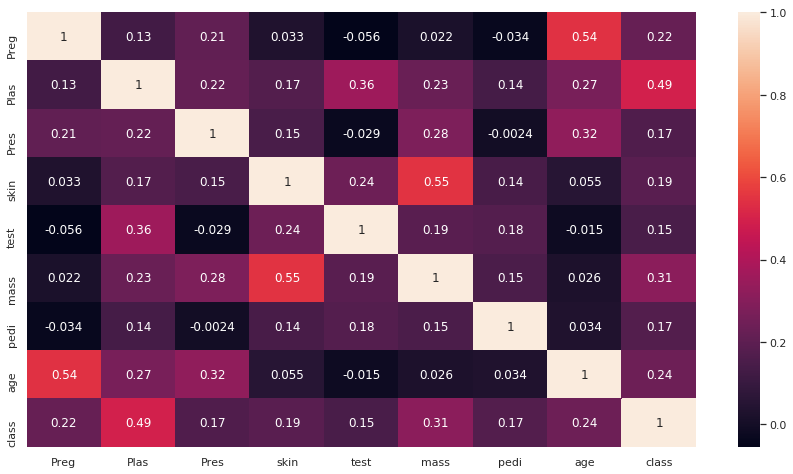

In [78]:
#Checking for correlation between the columns
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(pima_data.corr(), annot=True);

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [0]:
from sklearn.model_selection import train_test_split
X=pima_data.drop('class',axis=1)
y=pima_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5,test_size=0.3)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [91]:
from sklearn.metrics import confusion_matrix
y_pred=dt_model.predict(X_test)
dt_model.score(X_test , y_test) 

0.7835497835497836

In [92]:
confusion_matrix(y_test, y_pred)

array([[135,  25],
       [ 25,  46]])

Print the feature importance of the decision model - Optional

In [93]:
(dt_model.feature_importances_)


array([0.06966914, 0.47477208, 0.03534176, 0.        , 0.        ,
       0.19715653, 0.06658693, 0.15647356])